In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [21]:
df = yf.download('ETH-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1873,2022-12-26,1218.920166,1226.974365,1214.335938,1226.974365,1226.974365,3282098400
1874,2022-12-27,1226.987061,1230.418091,1205.895630,1212.791626,1212.791626,4091530737
1875,2022-12-28,1212.736572,1213.128906,1185.702148,1189.986084,1189.986084,4991669631
1876,2022-12-29,1190.010132,1204.141602,1188.360229,1201.595337,1201.595337,4132233940


In [22]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,1213.599976
1869,2022-12-22,1218.182129
1870,2022-12-23,1220.159424
1871,2022-12-24,1221.148560
1872,2022-12-25,1218.962036
1873,2022-12-26,1226.974365
1874,2022-12-27,1212.791626
1875,2022-12-28,1189.986084
1876,2022-12-29,1201.595337
1877,2022-12-30,1199.232788


In [23]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/crdjokn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/3a4g9lr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41005', 'data', 'file=/tmp/tmpjb5rn7zm/crdjokn9.json', 'init=/tmp/tmpjb5rn7zm/3a4g9lr1.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_modelg9h_fy6z/prophet_model-20230105084312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:43:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
df = df[:-1]
df

,ds,y
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003
...,...,...
1872,2022-12-25,1218.962036
1873,2022-12-26,1226.974365
1874,2022-12-27,1212.791626
1875,2022-12-28,1189.986084


In [25]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,698.142452,476.095897,1220.279367,698.142452,698.142452,146.516305,146.516305,146.516305,-1.292446,-1.292446,-1.292446,147.808751,147.808751,147.808751,0.0,0.0,0.0,844.658757
1,2017-11-10,697.755911,462.985521,1156.830664,697.755911,697.755911,133.832902,133.832902,133.832902,-5.122277,-5.122277,-5.122277,138.955179,138.955179,138.955179,0.0,0.0,0.0,831.588813
2,2017-11-11,697.369370,459.067372,1200.159763,697.369370,697.369370,128.479234,128.479234,128.479234,-1.569745,-1.569745,-1.569745,130.048979,130.048979,130.048979,0.0,0.0,0.0,825.848604
3,2017-11-12,696.982829,490.283970,1196.440770,696.982829,696.982829,121.633688,121.633688,121.633688,0.358574,0.358574,0.358574,121.275114,121.275114,121.275114,0.0,0.0,0.0,818.616517
4,2017-11-13,696.596288,449.470999,1173.969361,696.596288,696.596288,113.445823,113.445823,113.445823,0.640069,0.640069,0.640069,112.805754,112.805754,112.805754,0.0,0.0,0.0,810.042111


In [26]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [27]:
future.tail()

,ds
2238,2023-12-26
2239,2023-12-27
2240,2023-12-28
2241,2023-12-29
2242,2023-12-30


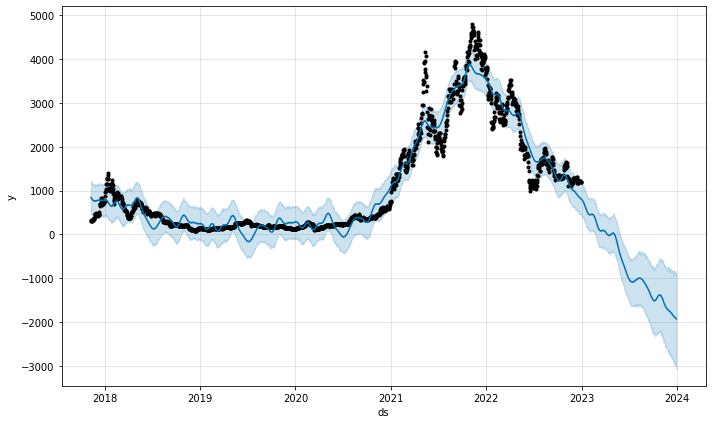

In [28]:
plot1 = m.plot(forecast)